In [1]:
import qiskit
import qiskit_ibm_runtime # type: ignore
import qiskit_ibm_provider # type: ignore

from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer # type: ignore
from qiskit import IBMQ




print(qiskit.qiskit.__version__)



0.46.1


/tmp/ipykernel_200843/3809412062.py:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  import qiskit_ibm_provider # type: ignore


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel='ibm_quantum', token='cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')

In [3]:
QiskitRuntimeService.save_account(channel='ibm_quantum', token='cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1',overwrite=True)

In [4]:
IBMQ.save_account('cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')

/tmp/ipykernel_200843/1484475670.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('cf70125004fa9422f6337afe3160ae67154dcf1b61ebec388ade05481b57df825d5dd53eab50b76f1f9fb0625f4e077ebfd6c544cb8c893d6a8294f7359954d1')
configrc.store_credentials:WARNING:2024-04-23 01:29:23,889: Credentials already present. Set overwrite=True to overwrite.


In [5]:
backend = service.backend(name='simulator_mps')
backend.num_qubits

100

/home/crisprbog/anaconda3/envs/code/lib/python3.12/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


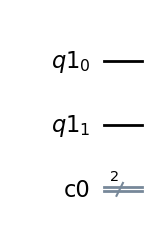

In [6]:
from qiskit import *
import matplotlib.pyplot as plt # type: ignore

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit  =  QuantumCircuit(qr, cr)
%matplotlib inline

circuit.draw(output='mpl')


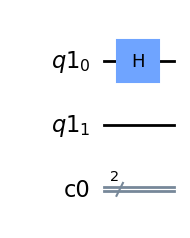

In [7]:
circuit.h(qr[0])
circuit.draw(output='mpl')

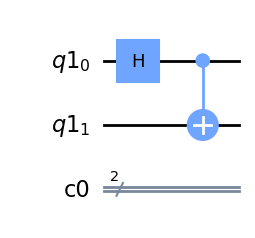

In [8]:
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

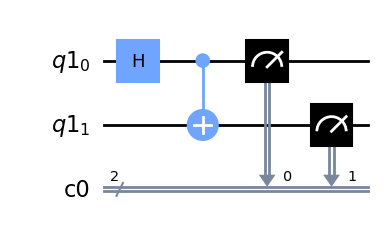

In [9]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
simulator = Aer.get_backend('qasm_simulator')
shots =10

/tmp/ipykernel_200843/3843271603.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')


In [12]:
from qiskit import execute # type: ignore


result = execute(circuit, backend=simulator,shots=shots).result()

/tmp/ipykernel_200843/4194853316.py:4: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, backend=simulator,shots=shots).result()


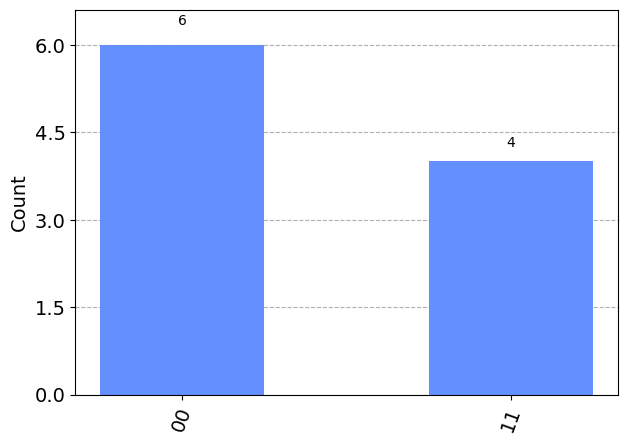

In [13]:
from qiskit.tools.visualization import plot_histogram # type: ignore

plot_histogram(result.get_counts(circuit))

In [14]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('simulator_mps')

In [15]:
job = execute(circuit, backend=qcomp)


/tmp/ipykernel_200843/1647507196.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=qcomp)


In [16]:
from qiskit.tools.monitor import job_monitor # type: ignore

job_monitor(job)

/tmp/ipykernel_200843/1068992839.py:1: DeprecationWarning: qiskit.tools.monitor is deprecated and will be removed in Qiskit 1.0.0
  from qiskit.tools.monitor import job_monitor # type: ignore


Job Status: job has successfully run


In [17]:
result = job.result()

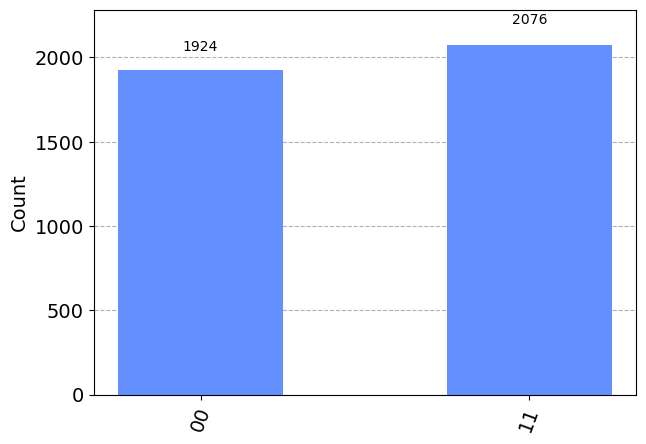

In [18]:
plot_histogram(result.get_counts(circuit))